# **Set up environment**

In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 50kB/s 
     |████████████████████████████████| 3.2MB 44.6MB/s 
     |████████████████████████████████| 491kB 49.8MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


Import libraries

In [ ]:
from google.colab import drive
import sys,os
from pathlib import Path
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

settup working environment

In [ ]:
drive.mount('/gdrive')
cd /gdrive/My\ Drive/tesis
# Get the current working directory
tesis_f = !pwd
print(tesis_f)
tesis_f = Path(str(tesis_f[0]))
this_f = str(tesis_f / "elizabeth2" / "Desarrollo")
# Add the parent folder of this file to the python path 
# in order to export the modules inside it.
sys.path.append(this_f)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/tesis
['/gdrive/My Drive/tesis']


import files

In [ ]:
import probing_classifiers
import Language_Analysis_t as Language_Analysis

In [ ]:
#Load the test results
dev_data_english = Language_Analysis.load_pickle("./data/depparse/dev_attn.pkl")
dev_data_english_o = Language_Analysis.load_pickle("./data/depparse_original/dev_attn.pkl")
dev_data_spanish = Language_Analysis.load_pickle("./data/depparse_es/dev_attn.pkl")
dev_data_italian = Language_Analysis.load_pickle("./data/depparse_it/dev_attn.pkl")
dev_data_german = Language_Analysis.load_pickle("./data/depparse_de/dev_attn.pkl")
dev_data_dict = {"English":dev_data_english, "English_o":dev_data_english_o,"Spanish":dev_data_spanish,
                 "Italian":dev_data_italian, "German":dev_data_german}

# **Results**

In [ ]:
# The data consists of a list of examples (dicts)
# with the following keys/values
# {
#    "words": list of words in the sentence
#    "heads": index of each word"s syntactic head (0 for ROOT, 1 for the first 
#             word of the sentence, etc.)
#    "relns": the relation between each word and its head
#    "attns": [n_layers, n_heads, seq_len, seq_len] tensor of attention maps
#             from BERT
#    "tokens": "words" after passing throught the tokenizer
#}
print("words:", dev_data_english[0]["words"])
print("heads:", dev_data_english[0]["heads"])
print("relns:", dev_data_english[0]["relns"])
print("tokens:", dev_data_english[0]["tokens"])
# Attention maps are 9x9 because [CLS] and [SEP] are added
print("attns: a tensor with shape", dev_data_english[0]["attns"].shape)
print(dev_data_english[0]["words"][dev_data_english[0]["heads"].index(0)])
dev_data_english[0]["relns"][dev_data_english[0]["heads"].index(0)]

words: ['“', 'While', 'much', 'of', 'the', 'digital', 'transition', 'is', 'unprecedented', 'in', 'the', 'United', 'States', ',', 'the', 'peaceful', 'transition', 'of', 'power', 'is', 'not', ',', '”', 'Obama', 'special', 'assistant', 'Kori', 'Schulman', 'wrote', 'in', 'a', 'blog', 'post', 'Monday', '.']
heads: [20, 9, 9, 7, 7, 7, 3, 9, 20, 13, 13, 13, 9, 20, 17, 17, 20, 19, 17, 0, 20, 20, 20, 26, 26, 29, 26, 26, 20, 33, 33, 33, 29, 29, 20]
relns: ['punct', 'mark', 'nsubj', 'case', 'det', 'amod', 'nmod', 'cop', 'advcl', 'case', 'det', 'compound', 'obl', 'punct', 'det', 'amod', 'nsubj', 'case', 'nmod', 'root', 'advmod', 'punct', 'punct', 'compound', 'amod', 'nsubj', 'flat', 'flat', 'parataxis', 'case', 'det', 'compound', 'obl', 'nmod:tmod', 'punct']
tokens: ['[CLS]', '[UNK]', 'while', 'much', 'of', 'the', 'digital', 'transition', 'is', 'un', '##pre', '##ced', '##ented', 'in', 'the', 'united', 'states', ',', 'the', 'peaceful', 'transition', 'of', 'power', 'is', 'not', ',', '[UNK]', 'obama'

'root'

In [ ]:
count = 0
pv = 0
for i in range(len(dev_data_english_o)):
  count += 1
  assert dev_data_english_o[i]["words"] == dev_data_english[i]["words"]
  assert dev_data_english_o[i]["heads"] == dev_data_english[i]["heads"]
  assert dev_data_english_o[i]["relns"] == dev_data_english[i]["relns"]
  try:
    assert dev_data_english_o[i]["tokens"] == dev_data_english[i]["tokens"]
  except:
    pv +=1
    if pv<20:
      print(dev_data_english_o[i]["tokens"])
      print(dev_data_english[i]["tokens"])
  assert dev_data_english_o[i]["attns"].shape == dev_data_english[i]["attns"].shape

## *Generate CSV*

### Save offsets of relations in example data

In [ ]:
Language_Analysis.save_relns_offsets(dev_data_dict,this_f+"/relns_offsets.csv")

### Generate best score for each relation and save it in a csv file

In [ ]:
#Save the best score for each relation in a individual csv
for lan in dev_data_dict:
  Language_Analysis.save_best_relns(dev_data_dict[lan], this_f+"/relns_"+lan+".csv")

### Generate all scores for each relation and save it in a csv file

In [ ]:
for lan in dev_data_dict:
  Language_Analysis.save_all_relns(dev_data_dict[lan], this_f+"/relns_all_"+lan+".csv")

### Generate all f1 scores for each relation and save it in a csv file

In [ ]:
for lan in dev_data_dict:
  Language_Analysis.save_all_relns_f1_scores(dev_data_dict[lan], this_f+"/relns_f1_all_"+lan+".csv")

### Generate cosine similarities csv file

In [ ]:
Language_Analysis.save_cosine_distances(dev_data_dict,this_f+"/cosine_distances_sp_de_it_en.csv")

### Generate mse csv file

In [ ]:
Language_Analysis.save_mse(dev_data_dict,this_f+"/mse_sp_de_it_en.csv")

### Generate max cosine distance permutation

In [ ]:
#Language_Analysis.save_max_perm_cosine_d(dev_data_dict,this_f+"/maxpcd_sp_de_it_en.csv")

In [ ]:
Language_Analysis.save_max_perm_cosine_d(dev_data_dict,this_f+"/mseminpcd_sp_de_it_en.csv")

### Individual update of csv

In [ ]:
#Individual update
lan = "English_o"
Language_Analysis.save_best_relns(dev_data_dict[lan], this_f+"/relns_"+lan+".csv")
Language_Analysis.save_all_relns(dev_data_dict[lan], this_f+"/relns_all_"+lan+".csv")

In [ ]:
#12/06/2020 22:25 - 23:01 English
#12/06/2020 23:06 - 23:41 Spanish
#13/06/2020 23:41 - 00:18 Italian
#13/06/2020 00:29 - 01:03 German
Language_Analysis.save_all_relns_f1_scores(dev_data_german, this_f+"/relns_f1_all_German.csv")

## *Tables and Plots*

### Best results table for each language

In [ ]:
print("English")
Language_Analysis.show_best_relns(dev_data_english)

English
all      |     0 | attn: 43.9 | offset= 1: 30.3 | 5-10 dep->head
case     |  2499 | attn: 77.8 | offset= 2: 36.2 | 5-4 dep->head
det      |  2047 | attn: 87.5 | offset= 1: 56.7 | 8-7 dep->head
nsubj    |  1393 | attn: 56.5 | offset= 1: 39.0 | 7-3 dep->head
amod     |  1336 | attn: 83.2 | offset= 1: 78.3 | 5-10 dep->head
obl      |  1237 | attn: 40.9 | offset=-3: 21.9 | 5-0 dep->head
nmod     |  1076 | attn: 45.2 | offset=-3: 35.2 | 3-6 dep->head
obj      |   876 | attn: 83.4 | offset=-2: 39.4 | 7-9 dep->head
advmod   |   852 | attn: 61.3 | offset= 1: 48.6 | 5-10 dep->head
compound |   810 | attn: 83.2 | offset= 1: 82.3 | 9-4 head<-dep
conj     |   634 | attn: 53.5 | offset=-2: 27.8 | 4-11 head<-dep
cc       |   574 | attn: 60.5 | offset= 1: 43.4 | 7-6 dep->head
mark     |   555 | attn: 62.5 | offset= 1: 53.7 | 9-9 dep->head
aux      |   410 | attn: 80.2 | offset= 1: 55.4 | 5-10 dep->head
nmod:pos |   365 | attn: 75.9 | offset= 1: 47.4 | 5-10 dep->head
cop      |   316 | attn: 7

In [ ]:
print("Spanish")
Language_Analysis.show_best_relns(dev_data_spanish)

Spanish
all      |     0 | attn: 44.4 | offset= 1: 31.3 | 5-10 dep->head
case     |  3698 | attn: 82.4 | offset= 2: 47.5 | 5-4 dep->head
det      |  3486 | attn: 90.2 | offset= 1: 89.7 | 2-1 dep->head
nmod     |  1803 | attn: 57.1 | offset=-2: 40.1 | 3-6 dep->head
obl      |  1550 | attn: 47.3 | offset=-3: 32.1 | 5-0 dep->head
amod     |  1308 | attn: 89.7 | offset=-1: 60.7 | 5-10 dep->head
nsubj    |  1189 | attn: 59.5 | offset= 1: 25.6 | 7-3 dep->head
advmod   |   843 | attn: 60.9 | offset= 1: 39.0 | 5-10 dep->head
obj      |   790 | attn: 84.4 | offset=-2: 53.9 | 7-9 dep->head
conj     |   652 | attn: 49.4 | offset=-2: 22.2 | 4-11 head<-dep
cc       |   565 | attn: 67.1 | offset= 1: 41.1 | 5-4 dep->head
fixed    |   379 | attn: 86.0 | offset=-1: 69.4 | 9-9 head<-dep
aux      |   375 | attn: 83.2 | offset= 1: 72.0 | 5-10 dep->head
xcomp    |   356 | attn: 45.8 | offset=-2: 32.6 | 7-9 dep->head
appos    |   320 | attn: 55.0 | offset=-1: 50.3 | 7-8 dep->head
compound |   318 | attn: 89

In [ ]:
print("Spanish")
Language_Analysis.show_best_relns(dev_data_spanish)

In [ ]:
print("Italian")
Language_Analysis.show_best_relns(dev_data_italian)

In [ ]:
print("German")
Language_Analysis.show_best_relns(dev_data_german)

### Generate a heatmap of BERT attention heads for each language

language  English
language  English_o
language  Spanish
language  Italian
language  German


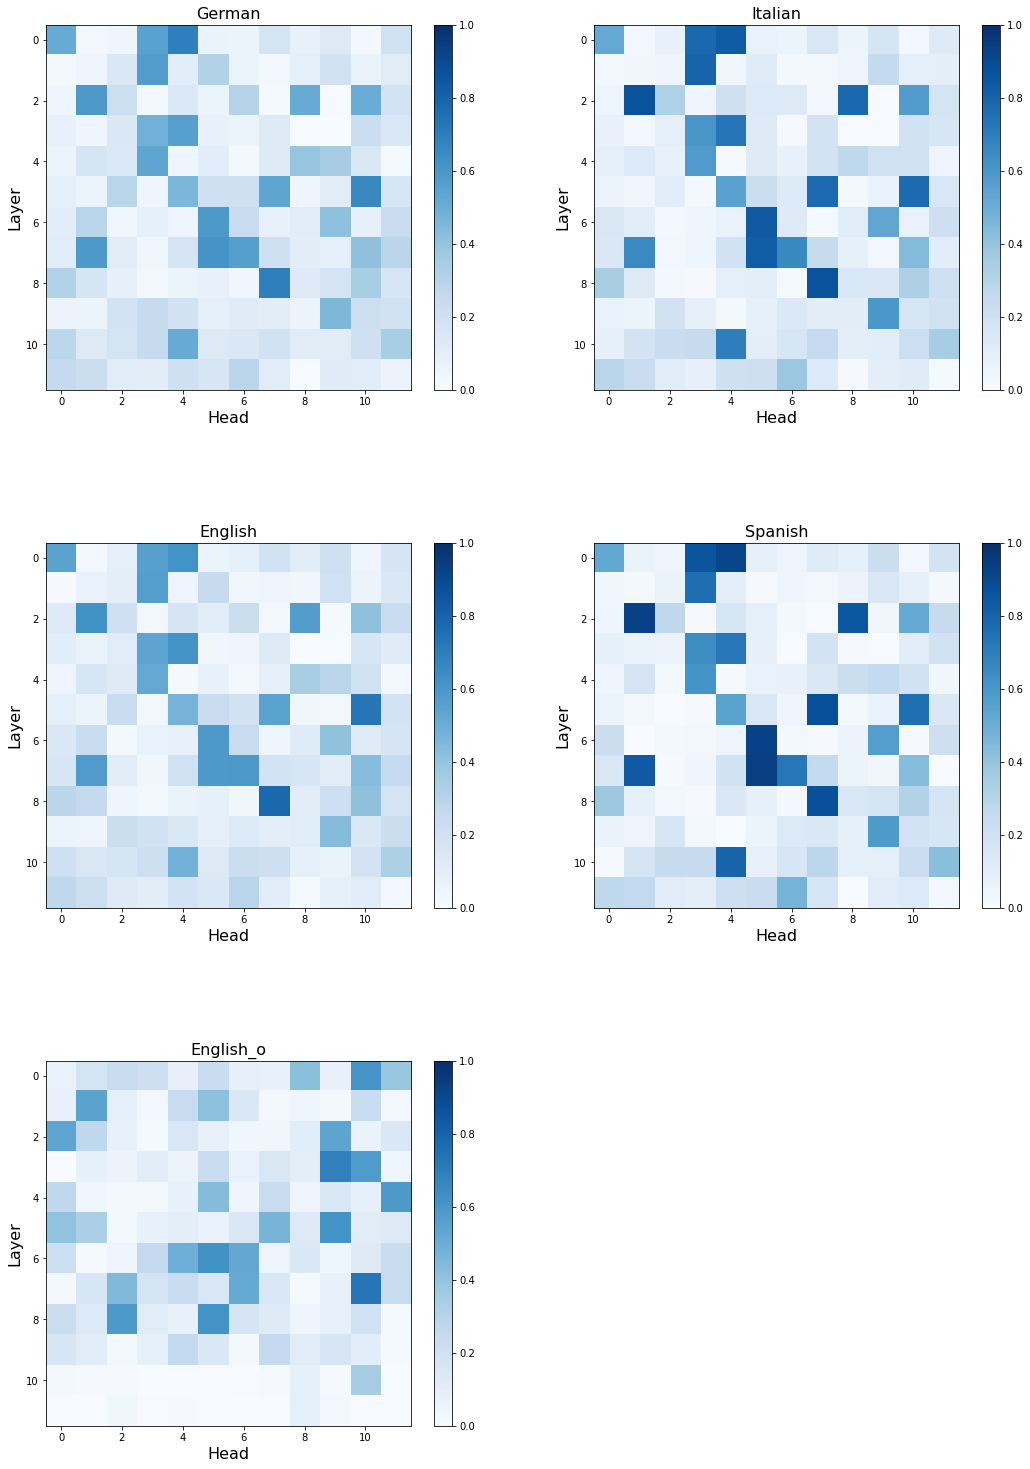

In [ ]:
style = {
    "title":{
        'color': "black",
        'size': 16
    },
    "xlabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    },
    "ylabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    }
}
Language_Analysis.plot_reln_score("nummod",dev_data_dict, style=style)

In [ ]:
import scipy.spatial
import numpy as np
import itertools

In [ ]:
v1 = np.random.uniform(size=(12,))
v2 = np.random.uniform(size=(12,))
x = -1
vs1 = sorted(v1)
vs2 = sorted(v2)
print(sum([vs1[i]*vs2[i] for i in range(len(vs2))]))


3.5826798839122453


array([0.14490516, 0.35978186, 0.01789617, 0.52616447, 0.33540442,
       0.23520037, 0.8429354 , 0.90714963, 0.78560859, 0.58573667,
       0.43179395, 0.86108404])

### Generate a graph of max accuracy per layer for chosen relations

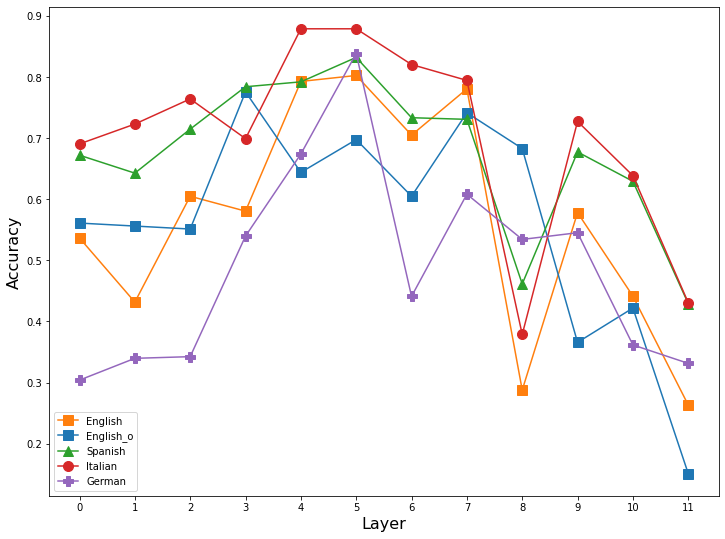

In [ ]:
style = {
    "title":{
        'weight':'bold',
        'color': "black",
        'size': 16
    },
    "xlabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    },
    "ylabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    }
}
Language_Analysis.plot_reln_score_layer(["aux"], dev_data_dict,style=style)
#det,"amod","case","nmod"

### Generate offsets graph for relation and language

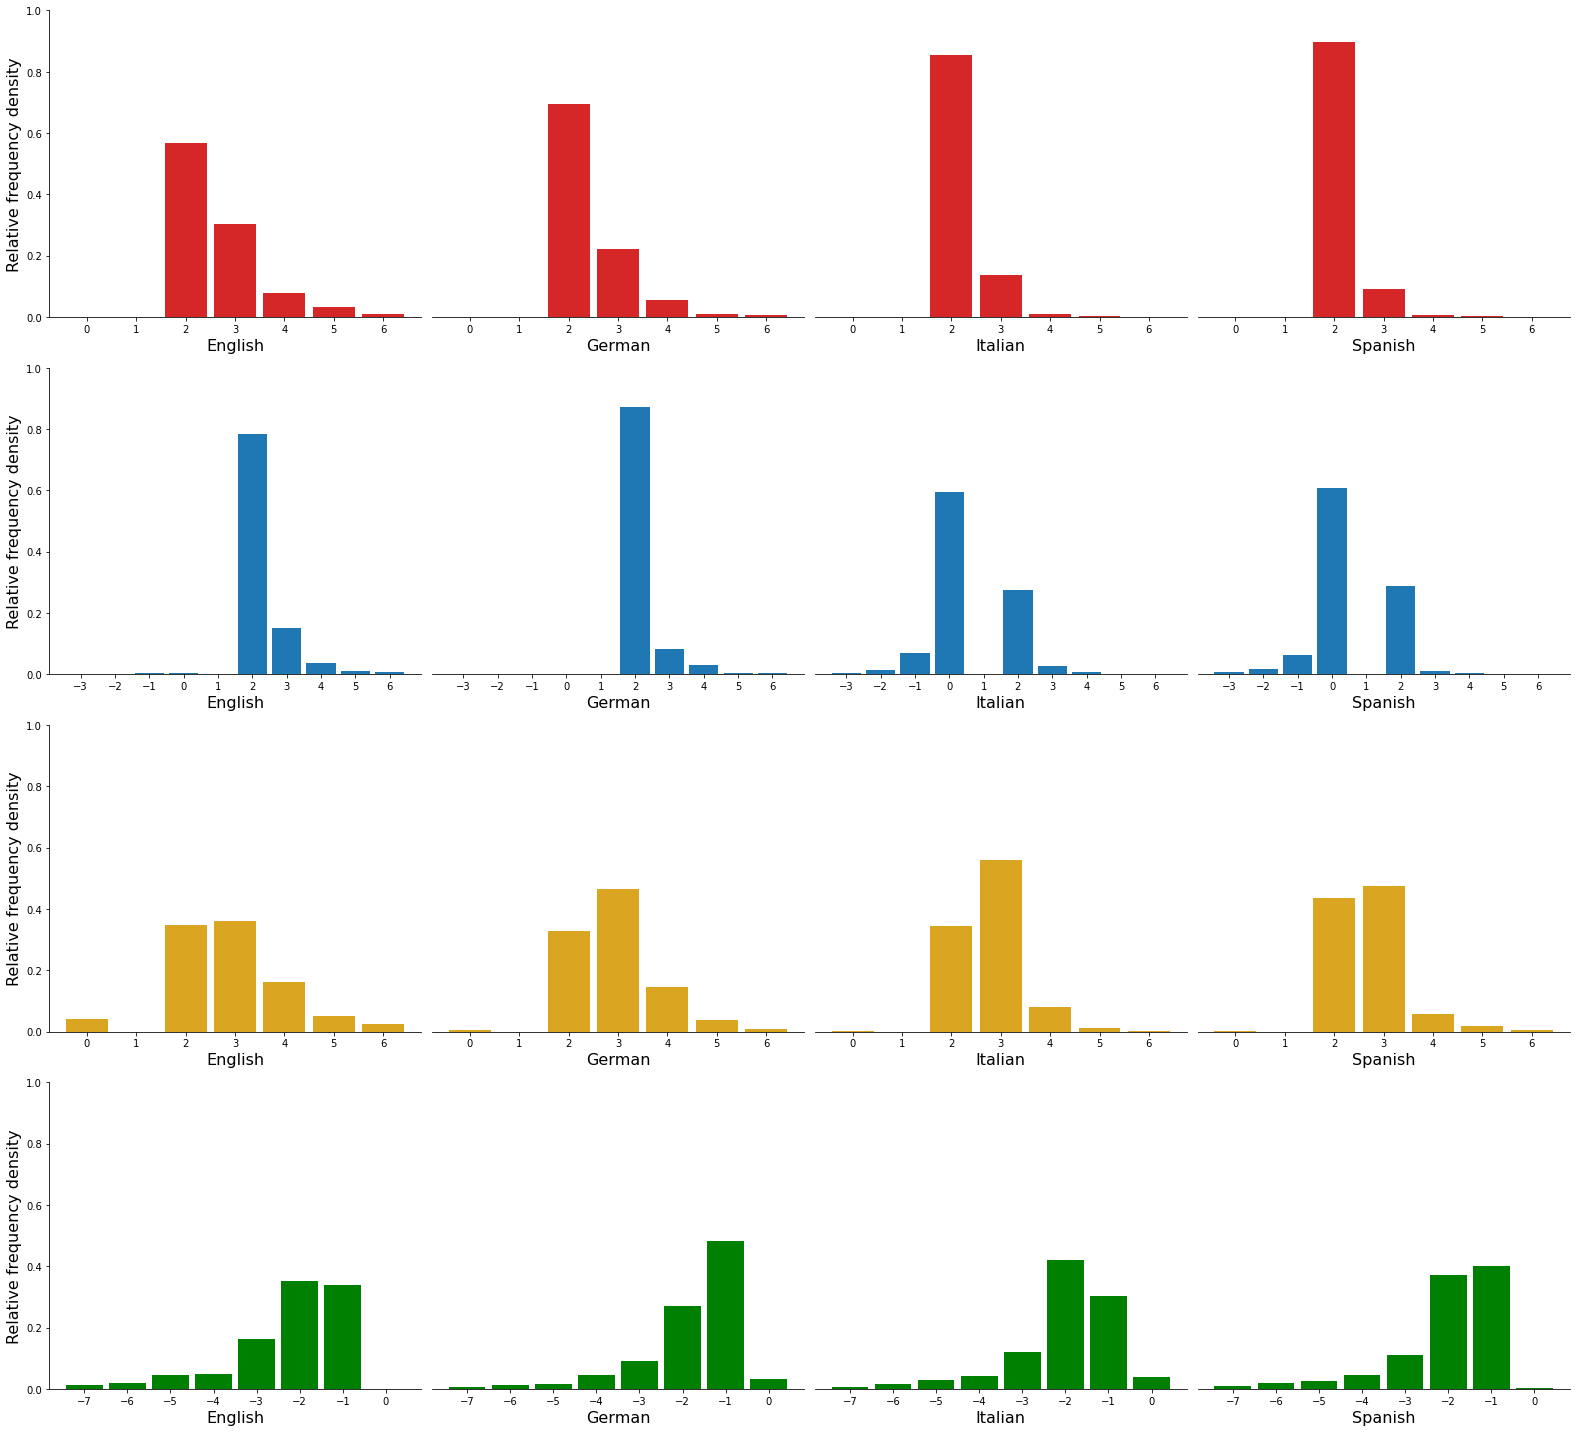

In [ ]:
relns = {"det": {
              "offsets": list(range(0,7)), 
              "color":"tab:red"
              },
         "amod": {
             "offsets": list(range(-3,7)),
             "color":"tab:blue"
             },
         "case":{
             "offsets": list(range(0,7)),
             "color":"goldenrod"
             },
         "nmod":{
             "offsets": list(range(-7,1)),
             "color":"green"
             }
         
}
style = {
    "title":{
        'weight':'bold',
        'color': "black",
        'size': 16
    },
    "xlabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    },
    "ylabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    }
}
Language_Analysis.plot_relative_freq_relns_examples({"English":dev_data_english, "Spanish":dev_data_spanish,
                 "Italian":dev_data_italian, "German":dev_data_german},relns,style=style)

### Generate language layer plot

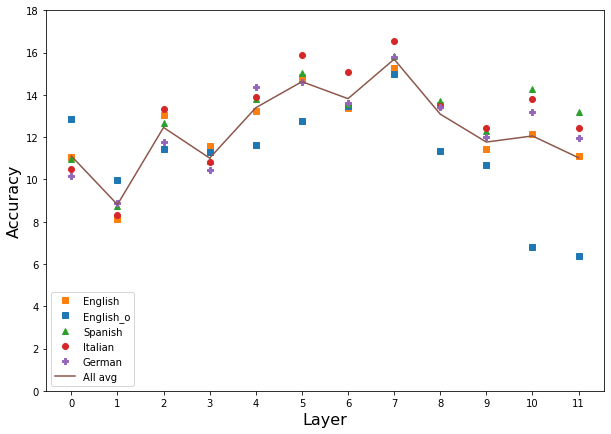

In [ ]:
style = {
    "title":{
        'weight':'bold',
        'color': "black",
        'size': 16
    },
    "xlabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    },
    "ylabel":{
        'weight':'normal',
        'color': "black",
        'size': 16
    }
}
Language_Analysis.plot_language_layer(dev_data_dict,style=style)


### Generate attention plots

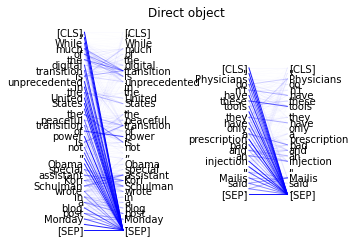

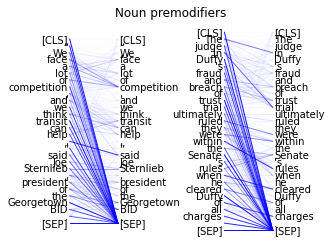

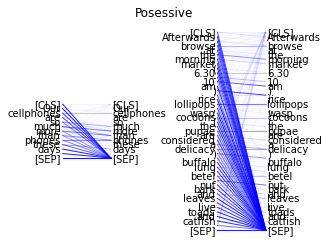

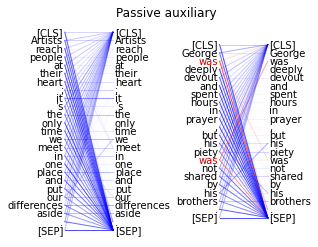

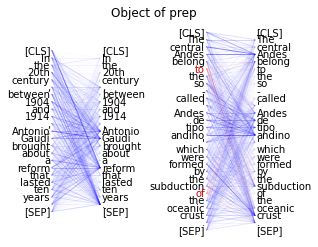

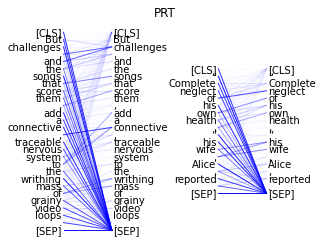

In [ ]:
Language_Analysis.plot_attn("Direct object", [dev_data_english[0], dev_data_english[100]], 8, 7, 
          ["funds", "plans", "line"], example_sep=4)

Language_Analysis.plot_attn("Noun premodifiers", [dev_data_english[13], dev_data_english[110]], 7, 10, 
          ["language", "law", "fight", "time", "executive"], color_from=False)
Language_Analysis.plot_attn("Posessive", [dev_data_english[111], dev_data_english[244]], 6, 5,
          ["his", "'s", "its"])
Language_Analysis.plot_attn("Passive auxiliary", [dev_data_english[192], dev_data_english[680]], 3, 9,
         ["been", "was"])
Language_Analysis.plot_attn("Object of prep", [dev_data_english[i] for i in [975, 979]], 8, 5,
          ["in", "with", "to", "of", "at"], hide_sep=True)
Language_Analysis.plot_attn("PRT", [dev_data_english[152], dev_data_english[160]], 5, 6,
          ["out", "around"])


# **Probing classifiers**

### Probing classifier English

In [ ]:
word2vec_vocab = Language_Analysis.load_pickle("./data/word2vec/vocabulary.pickle")
import numpy as np
word2vec_embeddings = np.load("./data/word2vec/embedding_matrix.npy")

In [ ]:
#type(word2vec_vocab) == dict
print("vocab", len(word2vec_vocab.keys()))
print("vocab", list(word2vec_vocab.keys())[:100])
print("vocab", [word2vec_vocab[k] for k in list(word2vec_vocab.keys())[:100]])
#type(word2vec_embeddings) == numpy.ndarray
print(word2vec_embeddings.shape)

In [ ]:
datos = {}
with open("./data/word2vec/embed_tweets_multi_400m_52D") as f:  
  for li,line in enumerate(f):
    data = line.strip().split(" ")
    datos[data[0]] = [float(i) for i in data[1:]]
    if li%10000==0:
      print(li)

In [ ]:
import numpy as np
n = len(datos)
k_0 = next(iter(datos))
embeddings = np.empty([n,len(datos[k_0])])
for i,(k,v) in enumerate(datos.items()):
  embeddings[i,:] = v
  datos[k] = i

In [ ]:
for i,(k,v) in enumerate(datos.items()):
  if i>20:
    break
  else:
    print(k,v)

In [ ]:
print(Language_Analysis.load_pickle("./data/word2vec/embeddings_embed_tweets_multi_400m_52D.pkl"))

In [ ]:
import pickle
pickle.dump( datos, open( "./data/word2vec/vocab_embed_tweets_multi_400m_52D.pkl", "wb" ))
pickle.dump( embeddings, open( "./data/word2vec/embeddings_embed_tweets_multi_400m_52D.pkl", "wb" ))

In [ ]:
embeddings.shape

In [ ]:
#k = Language_Analysis.load_pickle("./data/glove/embeddings.pkl")
print(type(k))
print(k.shape)

In [ ]:
pretrained_embeddings = Language_Analysis.load_pickle("./data/glove/embeddings.pkl")
pretrained_embeddings

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_and_words(dataset="word2vec_tweets_400m_52"), train_data,dev_data_english)

pre_embeddings (399981, 52)
vocab 399981
vocab ['!', 'rt', ',', '.', '<url>', 'a', 'de', ')', 'no', '(', 'you', 'to', 'y', 'the', '-', '..', 'el', 'is', 'le', 'mi', 'tu', 'so', 'se', 'and', 'es', 'lo', 'pas', "'", 'for', 'et', 'it', 'yo', 'ya', '/', 'of', 'les', 'por', 'this', 'il', '&', 'e', 'haha', 'that', 'was', 'just', 'al', 'pour', 'your', 'with', '>', 'have', 'moi', 'ich', 'las', 'non', 'we', 'da', 'een', 'quiero', 'niet', 'not', 'du', 'happy', 'back', 'd', 'x', 'too', 'met', 'miss', 'van', 'are', 'if', 'one', 'go', 'do', 'day', 'del', 'please', 'mon', 'ti', 'plus', 'jajaja', 'das', '^', 'ok', 'can', 'as', '1', 'know', "it's", 'ja', 'hoy', 'ah', 't', 'what', '<', 'au', 'gracias', 'na', 'eso']
vocab [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_linear_combo(), train_data,dev_data_english)

pre_embeddings (400001, 100)
vocab 400001
vocab ['biennials', 'verplank', 'soestdijk', 'woode', 'mdbo', 'sowell', 'mdbu', 'woods', 'spiders', 'mdbs', 'mdbr', 'woody', 'trawling', 'hwasung', 'spidery', 'regularize', 'hennings', 'canes', 'canet', 'caney', 'yusaf', 'chanthaburi', 'igual', 'gearóid', 'comptuex', 'caned', 'mirisch', 'kalecik', 'rickman', 'jacquemod', 'ioannidis', 'canel', 'canem', 'afikoman', 'heliothis', 'replacer', 'pigment', 'bogyman', 'transvestism', 'fuste', 'seamier', 'illtyd', 'wooded', 'shipworms', 'boorstein', 'grueling', 'persita', 'wooden', 'virtuosos', 'altagracia', 'salination', 'wasescha', 'troutwine', 'gentzen', 'immunities', 'all-news', 'two-and-a-half-story', 'thrace', 'maytham', 'gaskets', 'snuggles', 'abdulwahab', '2.1-million', 'deadheads', 'pulavar', '266-megahertz', 'consenting', 'snuggled', 'guntermann', 'grandcourt', 'usenet', 'videodrome', 'outfielders', 'isbin', '68-94', 'phealy', 'somjit', 'trivikram', 'rocque', 'bhubaneshwar', 'caner', 'quagmires

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())
writer.flush()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir .

In [ ]:
!pip uninstall tensorboard-plugin-wit

### Probing classifier Spanish

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_es/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_and_words("word2vec_tweets_400m_52"), train_data, dev_data_spanish)

pre_embeddings (399981, 52)
vocab 399981
vocab ['!', 'rt', ',', '.', '<url>', 'a', 'de', ')', 'no', '(', 'you', 'to', 'y', 'the', '-', '..', 'el', 'is', 'le', 'mi', 'tu', 'so', 'se', 'and', 'es', 'lo', 'pas', "'", 'for', 'et', 'it', 'yo', 'ya', '/', 'of', 'les', 'por', 'this', 'il', '&', 'e', 'haha', 'that', 'was', 'just', 'al', 'pour', 'your', 'with', '>', 'have', 'moi', 'ich', 'las', 'non', 'we', 'da', 'een', 'quiero', 'niet', 'not', 'du', 'happy', 'back', 'd', 'x', 'too', 'met', 'miss', 'van', 'are', 'if', 'one', 'go', 'do', 'day', 'del', 'please', 'mon', 'ti', 'plus', 'jajaja', 'das', '^', 'ok', 'can', 'as', '1', 'know', "it's", 'ja', 'hoy', 'ah', 't', 'what', '<', 'au', 'gracias', 'na', 'eso']
vocab [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_es/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_linear_combo(), train_data,dev_data_spanish)

pre_embeddings (400001, 100)
vocab 400001
vocab ['biennials', 'verplank', 'soestdijk', 'woode', 'mdbo', 'sowell', 'mdbu', 'woods', 'spiders', 'mdbs', 'mdbr', 'woody', 'trawling', 'hwasung', 'spidery', 'regularize', 'hennings', 'canes', 'canet', 'caney', 'yusaf', 'chanthaburi', 'igual', 'gearóid', 'comptuex', 'caned', 'mirisch', 'kalecik', 'rickman', 'jacquemod', 'ioannidis', 'canel', 'canem', 'afikoman', 'heliothis', 'replacer', 'pigment', 'bogyman', 'transvestism', 'fuste', 'seamier', 'illtyd', 'wooded', 'shipworms', 'boorstein', 'grueling', 'persita', 'wooden', 'virtuosos', 'altagracia', 'salination', 'wasescha', 'troutwine', 'gentzen', 'immunities', 'all-news', 'two-and-a-half-story', 'thrace', 'maytham', 'gaskets', 'snuggles', 'abdulwahab', '2.1-million', 'deadheads', 'pulavar', '266-megahertz', 'consenting', 'snuggled', 'guntermann', 'grandcourt', 'usenet', 'videodrome', 'outfielders', 'isbin', '68-94', 'phealy', 'somjit', 'trivikram', 'rocque', 'bhubaneshwar', 'caner', 'quagmires

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Probing classifier German

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_de/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_and_words(dataset="word2vec_tweets_400m_52"), train_data,dev_data_german)

pre_embeddings (399981, 52)
vocab 399981
vocab ['!', 'rt', ',', '.', '<url>', 'a', 'de', ')', 'no', '(', 'you', 'to', 'y', 'the', '-', '..', 'el', 'is', 'le', 'mi', 'tu', 'so', 'se', 'and', 'es', 'lo', 'pas', "'", 'for', 'et', 'it', 'yo', 'ya', '/', 'of', 'les', 'por', 'this', 'il', '&', 'e', 'haha', 'that', 'was', 'just', 'al', 'pour', 'your', 'with', '>', 'have', 'moi', 'ich', 'las', 'non', 'we', 'da', 'een', 'quiero', 'niet', 'not', 'du', 'happy', 'back', 'd', 'x', 'too', 'met', 'miss', 'van', 'are', 'if', 'one', 'go', 'do', 'day', 'del', 'please', 'mon', 'ti', 'plus', 'jajaja', 'das', '^', 'ok', 'can', 'as', '1', 'know', "it's", 'ja', 'hoy', 'ah', 't', 'what', '<', 'au', 'gracias', 'na', 'eso']
vocab [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_de/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_linear_combo(), train_data,dev_data_german)

pre_embeddings (400001, 100)
vocab 400001
vocab ['biennials', 'verplank', 'soestdijk', 'woode', 'mdbo', 'sowell', 'mdbu', 'woods', 'spiders', 'mdbs', 'mdbr', 'woody', 'trawling', 'hwasung', 'spidery', 'regularize', 'hennings', 'canes', 'canet', 'caney', 'yusaf', 'chanthaburi', 'igual', 'gearóid', 'comptuex', 'caned', 'mirisch', 'kalecik', 'rickman', 'jacquemod', 'ioannidis', 'canel', 'canem', 'afikoman', 'heliothis', 'replacer', 'pigment', 'bogyman', 'transvestism', 'fuste', 'seamier', 'illtyd', 'wooded', 'shipworms', 'boorstein', 'grueling', 'persita', 'wooden', 'virtuosos', 'altagracia', 'salination', 'wasescha', 'troutwine', 'gentzen', 'immunities', 'all-news', 'two-and-a-half-story', 'thrace', 'maytham', 'gaskets', 'snuggles', 'abdulwahab', '2.1-million', 'deadheads', 'pulavar', '266-megahertz', 'consenting', 'snuggled', 'guntermann', 'grandcourt', 'usenet', 'videodrome', 'outfielders', 'isbin', '68-94', 'phealy', 'somjit', 'trivikram', 'rocque', 'bhubaneshwar', 'caner', 'quagmires

### Probing classifier Italian

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_it/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_and_words(dataset="word2vec_tweets_400m_52"), train_data,dev_data_italian)

pre_embeddings (399981, 52)
vocab 399981
vocab ['!', 'rt', ',', '.', '<url>', 'a', 'de', ')', 'no', '(', 'you', 'to', 'y', 'the', '-', '..', 'el', 'is', 'le', 'mi', 'tu', 'so', 'se', 'and', 'es', 'lo', 'pas', "'", 'for', 'et', 'it', 'yo', 'ya', '/', 'of', 'les', 'por', 'this', 'il', '&', 'e', 'haha', 'that', 'was', 'just', 'al', 'pour', 'your', 'with', '>', 'have', 'moi', 'ich', 'las', 'non', 'we', 'da', 'een', 'quiero', 'niet', 'not', 'du', 'happy', 'back', 'd', 'x', 'too', 'met', 'miss', 'van', 'are', 'if', 'one', 'go', 'do', 'day', 'del', 'please', 'mon', 'ti', 'plus', 'jajaja', 'das', '^', 'ok', 'can', 'as', '1', 'know', "it's", 'ja', 'hoy', 'ah', 't', 'what', '<', 'au', 'gracias', 'na', 'eso']
vocab [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_it/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_linear_combo(), train_data,dev_data_italian)

pre_embeddings (400001, 100)
vocab 400001
vocab ['biennials', 'verplank', 'soestdijk', 'woode', 'mdbo', 'sowell', 'mdbu', 'woods', 'spiders', 'mdbs', 'mdbr', 'woody', 'trawling', 'hwasung', 'spidery', 'regularize', 'hennings', 'canes', 'canet', 'caney', 'yusaf', 'chanthaburi', 'igual', 'gearóid', 'comptuex', 'caned', 'mirisch', 'kalecik', 'rickman', 'jacquemod', 'ioannidis', 'canel', 'canem', 'afikoman', 'heliothis', 'replacer', 'pigment', 'bogyman', 'transvestism', 'fuste', 'seamier', 'illtyd', 'wooded', 'shipworms', 'boorstein', 'grueling', 'persita', 'wooden', 'virtuosos', 'altagracia', 'salination', 'wasescha', 'troutwine', 'gentzen', 'immunities', 'all-news', 'two-and-a-half-story', 'thrace', 'maytham', 'gaskets', 'snuggles', 'abdulwahab', '2.1-million', 'deadheads', 'pulavar', '266-megahertz', 'consenting', 'snuggled', 'guntermann', 'grandcourt', 'usenet', 'videodrome', 'outfielders', 'isbin', '68-94', 'phealy', 'somjit', 'trivikram', 'rocque', 'bhubaneshwar', 'caner', 'quagmires

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Probing classifier English Original

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_original/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_and_words(tokenizer="bert_o",dataset="word2vec_tweets_400m_52"), train_data, dev_data_english_o)

pre_embeddings (399981, 52)
vocab 399981
vocab ['!', 'rt', ',', '.', '<url>', 'a', 'de', ')', 'no', '(', 'you', 'to', 'y', 'the', '-', '..', 'el', 'is', 'le', 'mi', 'tu', 'so', 'se', 'and', 'es', 'lo', 'pas', "'", 'for', 'et', 'it', 'yo', 'ya', '/', 'of', 'les', 'por', 'this', 'il', '&', 'e', 'haha', 'that', 'was', 'just', 'al', 'pour', 'your', 'with', '>', 'have', 'moi', 'ich', 'las', 'non', 'we', 'da', 'een', 'quiero', 'niet', 'not', 'du', 'happy', 'back', 'd', 'x', 'too', 'met', 'miss', 'van', 'are', 'if', 'one', 'go', 'do', 'day', 'del', 'please', 'mon', 'ti', 'plus', 'jajaja', 'das', '^', 'ok', 'can', 'as', '1', 'know', "it's", 'ja', 'hoy', 'ah', 't', 'what', '<', 'au', 'gracias', 'na', 'eso']
vocab [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,

In [ ]:
tf.reset_default_graph()
train_data = Language_Analysis.load_pickle("./data/depparse_original/train_attn.pkl")
probing_classifiers.run_training(probing_classifiers.attn_linear_combo(tokenizer="bert_o"), train_data,dev_data_english_o)

pre_embeddings (400001, 100)
vocab 400001
vocab ['biennials', 'verplank', 'soestdijk', 'woode', 'mdbo', 'sowell', 'mdbu', 'woods', 'spiders', 'mdbs', 'mdbr', 'woody', 'trawling', 'hwasung', 'spidery', 'regularize', 'hennings', 'canes', 'canet', 'caney', 'yusaf', 'chanthaburi', 'igual', 'gearóid', 'comptuex', 'caned', 'mirisch', 'kalecik', 'rickman', 'jacquemod', 'ioannidis', 'canel', 'canem', 'afikoman', 'heliothis', 'replacer', 'pigment', 'bogyman', 'transvestism', 'fuste', 'seamier', 'illtyd', 'wooded', 'shipworms', 'boorstein', 'grueling', 'persita', 'wooden', 'virtuosos', 'altagracia', 'salination', 'wasescha', 'troutwine', 'gentzen', 'immunities', 'all-news', 'two-and-a-half-story', 'thrace', 'maytham', 'gaskets', 'snuggles', 'abdulwahab', '2.1-million', 'deadheads', 'pulavar', '266-megahertz', 'consenting', 'snuggled', 'guntermann', 'grandcourt', 'usenet', 'videodrome', 'outfielders', 'isbin', '68-94', 'phealy', 'somjit', 'trivikram', 'rocque', 'bhubaneshwar', 'caner', 'quagmires

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
